In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, RocCurveDisplay
)

# Load reduced dataset (from Step 2.3)
train_df = pd.read_csv("heart_disease_reduced_train.csv")
test_df  = pd.read_csv("heart_disease_reduced_test.csv")

X_train = train_df.drop(columns=["target"])
y_train = train_df["target"]
X_test  = test_df.drop(columns=["target"])
y_test  = test_df["target"]

print("Train shape:", X_train.shape, " Test shape:", X_test.shape)


Train shape: (736, 21)  Test shape: (184, 21)


In [2]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver="liblinear"),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM": SVC(kernel="rbf", probability=True, random_state=42)
}

fitted_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    fitted_models[name] = model
    print(f"{name} trained successfully!")


Logistic Regression trained successfully!
Decision Tree trained successfully!
Random Forest trained successfully!
SVM trained successfully!


In [3]:
metrics = []

for name, model in fitted_models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]

    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)
    auc  = roc_auc_score(y_test, y_proba)

    metrics.append([name, acc, prec, rec, f1, auc])

# Convert to DataFrame
results_df = pd.DataFrame(metrics, columns=["Model","Accuracy","Precision","Recall","F1-score","AUC"])
print(results_df)


                 Model  Accuracy  Precision    Recall  F1-score       AUC
0  Logistic Regression  0.826087   0.824074  0.872549  0.847619  0.901961
1        Decision Tree  0.728261   0.760000  0.745098  0.752475  0.726208
2        Random Forest  0.831522   0.838095  0.862745  0.850242  0.920074
3                  SVM  0.804348   0.789474  0.882353  0.833333  0.906504


<Figure size 800x600 with 0 Axes>

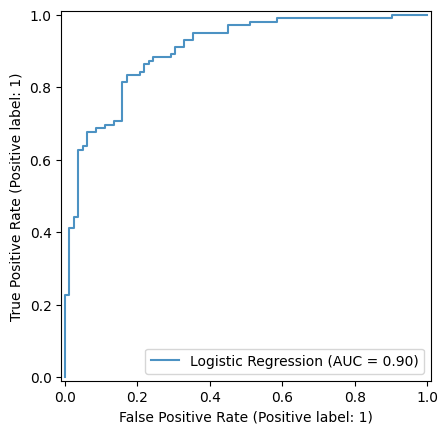

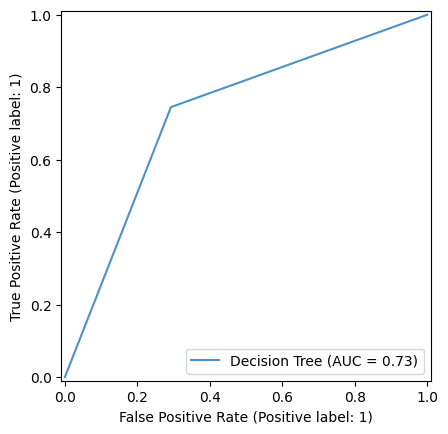

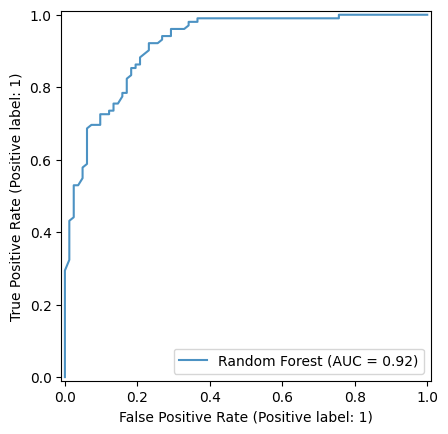

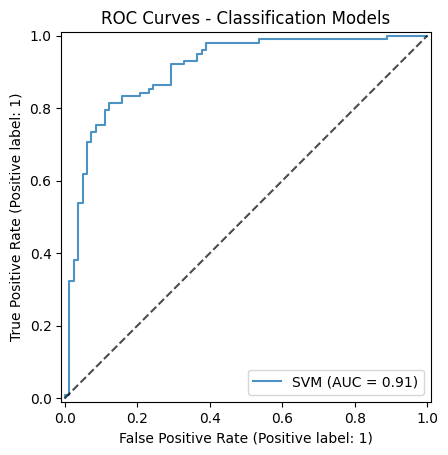

In [4]:
plt.figure(figsize=(8,6))

for name, model in fitted_models.items():
    RocCurveDisplay.from_estimator(model, X_test, y_test, name=name, alpha=0.8)

plt.title("ROC Curves - Classification Models")
plt.plot([0,1],[0,1],"k--",alpha=0.7)
plt.show()


In [8]:
# Save metrics
results_df.to_csv("supervised_model_metrics.csv", index=False)
print("Saved performance metrics!")

# Save models
import joblib
for name, model in fitted_models.items():
    fname = name.lower().replace(" ","_") + ".joblib"
    joblib.dump(model, f"{fname}")
print("Saved trained models!")


Saved performance metrics!
Saved trained models!
